# 4. 파이토치 기본
## 4.3 데이터 불러오기

### 4.3.1 파이토치 제공 데이터 사용

In [1]:
import torch # 파이토치 기본 라이브러리 
import torchvision # 이미지 관련 된 파이토치 라이브러리
import torchvision.transforms as tr # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import numpy as np # 넘파이 기본 라이브러리
import matplotlib.pyplot as plt

In [2]:
# tr.Compose 내에 원하는 전처리를 차례대로 넣어주면 된다.

transf = tr.Compose([tr.Resize(16),tr.ToTensor()]) # 16x16으로 이미지 크기 변환 후 텐서 타입으로 변환한다.

# Transforms on PIL Image
# Pad, Grayscale, RandomCrop, Normalize ..
# Transforms on torch.*Tensor - tensor image
# torchvision.transforms.ToPILImage(mode=None)...
# ... 


In [3]:
# torchvision.datasets에서 제공하는 CIFAR10 데이터를 불러온다.
# root에는 다운로드 받을 경로를 입력한다.
# train=Ture이면 학습 데이터를 불러오고 train=False이면 테스트 데이터를 불러온다.
# 미리 선언한 전처리를 사용하기 위해 transform=transf을 입력한다.

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

0it [00:00, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# 일반적으로 데이터셋은 이미지와 라벨이 동시에 들어있는 튜플(tuple) 형태다. (이미지, 라벨)
# trainset[0]은 학습 데이터의 첫 번째 데이터로 이미지 한 장과 라벨 숫자 하나가 저장되어 있다.
# 즉, trainset[0][0]은 이미지이며 trainset[0][1]은 라벨이다.

print(trainset[0][0].size()) 

# 현재 이미지 사이즈는 3x16x16이다. 여기서 3은 채널 수를 말하고 16x16은 이미지의 너비와 높이를 의미한다.
# 일반적인 컬러 사진은 RGB 이미지이기 때문에 채널이 3개 이고 (너비)x(높이)x(채널 수)로 크기가 표현된다.
# 하지만 파이토치에서는 이미지 한 장이 (채널 수)x(너비)x(높이)으로 표현되니 유의하도록 한다.

torch.Size([3, 16, 16])


In [5]:
# DataLoader는 데이터를 미니 배치 형태로 만들어 준다.
# 따라서 배치 사이즈 및 셔플 여부 등을 선택할 수 있다.
trainloader = DataLoader(trainset, batch_size=50, shuffle=True)
testloader = DataLoader(testset, batch_size=50, shuffle=False)

In [6]:
len(trainloader)
# CIFAR10의 학습 이미지는 50,000장이고 배치 사이즈가 50장이므로 1,000은 배치의 개수가 된다.
# 즉 trainloader가 잘 만들어졌다는 것을 단편적으로 알 수 있다.

1000

In [7]:
# iter, next를 이용해 일부 데이터를 확인할 수 있다.
images, labels = iter(trainloader).next()
print(images.size())
# 일반적으로 학습 데이터는 4차원 형태로 모델에서 사용된다.
# (배치 크기)x(채널 수)x(너비)x(높이)

torch.Size([50, 3, 16, 16])


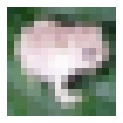

In [8]:
oneshot = images[1].permute(1,2,0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

### 4.3.2 같은 클래스 별로 폴더를 정리한 경우

In [9]:
# from google.colab import drive
# drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# cd/content/gdrive/My Drive/pytorch_dlbro

/content/gdrive/My Drive/pytorch_dlbro


In [10]:
# 데이터가 같은 클래스 별로 미리 폴더를 정리 된 경우, ImageFolder의 1줄 선언으로 개인 데이터를 사용할 수 있다.
# 별도의 라벨링이 필요 없으며 폴더 별로 자동으로 라벨링을 한다.
# 예를 들어 class 폴더에 tiger, lion 폴더(./class/tiger와 ./class/lion)를 미리 만든다.
# 다음으로 ImageFolder에 상위 폴더 ./class를 입력하면 이미지와 라벨이 정리 되어 데이터를 불러온다.

transf = tr.Compose([tr.Resize(128),tr.ToTensor()]) # 128x128 이미지 크기 변환 후 텐서로 만든다.
trainset = torchvision.datasets.ImageFolder(root='./class', transform=transf) # 커스텀 데이터 불러온다.
trainloader = DataLoader(trainset, batch_size=2, shuffle=False) # 데이터를 미니 배치 형태로 만들어 준다.

In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size(),labels)

torch.Size([2, 3, 134, 128]) tensor([0, 0])


### 4.3.3 정리되지 않은 커스텀 데이터 불러오기

In [12]:
# 32x32 컬러 이미지와 라벨이 각각 100장이 있다고 가정하다.

train_images = np.random.randint(256,size=(100,32,32,3))/255 # (이미지 수)x(너비)x(높이)x(채널 수)
train_labels = np.random.randint(2,size=(100,1)) # 라벨 수

# 이미지 전처리 작업이 필요할 경우 openCV와 같은 라이브러리를 이용하여 이 곳에서 작업할 수도 있다.
# 필자는 이 단계에서 전처리하는 것을 선호한다. 그 이유는 torchvision.transforms 라이브러리 보다
# OpenCV, SciPy와 같은 라이브러리가 더 많은 전처리 기술을 제공하며 이미지를 미리 처리해 놓고 전처리 된 이미지를 살펴보면서 
# 작업하는 것을 좋아하기 때문이다. 따라서 사용 목적과 편의성에 맞게 본인이 전처리를 어디서 할 지 정하면 될 것이다.

#......
#......
#......
#train_images, train_labels = preprocessing(train_images, train_labels)
#......
#......
#......

print(train_images.shape, train_labels.shape)

(100, 32, 32, 3) (100, 1)


In [ ]:
"""
from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self):
    
    def __getitem__(self, index):
    
    def __len__(self):

이 양식을 통으로 가지고 다니자!!
"""

class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data) # 이미지 데이터를 FloatTensor로 변형
        self.x_data = self.x_data.permute(0,3,1,2) # (이미지 수)x(너비)x(높이)x(채널 수) -> (배치 크기)x(채널 수)x(너비)x(높이)
        self.y_data = torch.LongTensor(y_data) # 라벨 데이터를 LongTensor로 변형
        self.len = self.y_data.shape[0] # 클래스 내의 들어 온 데이터 개수 

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index] # 뽑아 낼 데이터를 적어준다.

    def __len__(self):
        return self.len # 클래스 내의 들어 온 데이터 개수 

# 파이토치에서는 (배치 크기)x(채널 수)x(너비)x(높이) 데이터가 사용 되므로 원래 데이터 (이미지 수)x(너비)x(높이)x(채널 수)를 변경해야만 한다. 
# permute에서 0(이미지 수), 1(너비),2 (높이), 3(채널 수)을 0(이미지 수), 3(채널 수), 1(너비),2 (높이)로 바꿔주는 것이기 때문에
# .permute(0,3,1,2)을 사용하는 것이다.

In [ ]:
train_data = TensorData(train_images,train_labels) # 텐서 데이터 불러오기 
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) # 미니 배치 형태로 데이터 갖추기